In [65]:
import keras
#for initializing the Convolutional Neural Network(CNN)
from keras.models import Sequential
#step--->1
#for making the convolutional layers.....
from keras.layers import Conv2D
#step--->2
#for maxpooling 
from keras.layers import MaxPooling2D
#step---->3
#for Flatting process
from keras.layers import Flatten
#step----->4
#for adding the final layer in CNN
from keras.layers import Dense

In [66]:
cd /home/abhishek/Downloads/P16-Convolutional-Neural-Networks(1)/Convolutional_Neural_Networks

/home/abhishek/Downloads/P16-Convolutional-Neural-Networks(1)/Convolutional_Neural_Networks


# Initializing the Convolutioanl Neyral Network(CNN)

In [67]:

classifier=Sequential()

### input_shape(64,64,3)---->(64,64) is indicating the size of image and 3 is indicating the dimenision of the image.
in maxpooling the pool_size is denoting that we are takking the dimenision for making pooled feature map is 2*2 dimension.
Flattening is simply for the flatting the feature pooled map.
Now we are adding an output layer for getting output of the CNN
Lastly we are compililig the the CNN

In [68]:
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,3,3,activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/home/abhishek/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
from keras.preprocessing.image import ImageDataGenerator
# importing a class of ImageDatatGenerator for fitting the CNN to images

In [70]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
#rescale is ussing for the rescale the size between 0 to 1 wecaue in neural network scalling is very import....
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('dataset/training_set',
                                              target_size=(64,64),
                                              batch_size=25,
                                              class_mode='binary')
test_set=test_datagen.flow_from_directory('dataset/test_set',
                                         target_size=(64,64),
                                         batch_size=25,
                                         class_mode='binary')
classifier.fit_generator(training_set,
                        steps_per_epoch=200,
                        epochs=10,
                        validation_data=test_set,
                        validation_steps=20)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10
200/200 [==============================] - 138s 692ms/step - loss: 0.6814 - acc: 0.5640 - val_loss: 0.6650 - val_acc: 0.5860
Epoch 2/10
200/200 [==============================] - 113s 564ms/step - loss: 0.6309 - acc: 0.6506 - val_loss: 0.6242 - val_acc: 0.6740
Epoch 3/10
200/200 [==============================] - 92s 458ms/step - loss: 0.5994 - acc: 0.6796 - val_loss: 0.6002 - val_acc: 0.6740
Epoch 4/10
200/200 [==============================] - 91s 453ms/step - loss: 0.5698 - acc: 0.7056 - val_loss: 0.5495 - val_acc: 0.7020
Epoch 5/10
200/200 [==============================] - 91s 453ms/step - loss: 0.5506 - acc: 0.7154 - val_loss: 0.5682 - val_acc: 0.7080
Epoch 6/10
200/200 [==============================] - 90s 452ms/step - loss: 0.5336 - acc: 0.7314 - val_loss: 0.5156 - val_acc: 0.7480
Epoch 7/10
200/200 [==============================] - 91s 453ms/step - loss: 0.5244 - acc: 0.7386 - val_

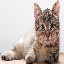

In [71]:
#making some predictionfor cat...
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('dataset/single_prediction/cat_or_dog_2.jpg',target_size=(64,64))
test_image

In [72]:
test_image=image.img_to_array(test_image)
test_image

array([[[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [244., 244., 244.]],

       [[239., 239., 239.],
        [239., 239., 239.],
        [239., 239., 239.],
        ...,
        [244., 244., 244.],
        [244., 244., 244.],
        [244., 244., 244.]],

       ...,

       [[241., 217., 205.],
        [243., 220., 206.],
        [241., 219., 205.],
        ...,
        [227., 200., 181.],
        [233., 205., 191.],
        [232., 215., 197.]],

       [[255., 237., 227.],
        [251., 234., 227.],
        [252., 235., 227.],
        ...,
        [219., 193., 178.],
        [219., 193., 180.],
        [216., 189., 172.]],

       [[243., 230., 222.],
        [250., 235., 228.],
        [246., 2

In [73]:
test_image=np.expand_dims(test_image,axis=0)
test_image

array([[[[239., 239., 239.],
         [239., 239., 239.],
         [239., 239., 239.],
         ...,
         [245., 245., 245.],
         [245., 245., 245.],
         [245., 245., 245.]],

        [[239., 239., 239.],
         [239., 239., 239.],
         [239., 239., 239.],
         ...,
         [245., 245., 245.],
         [245., 245., 245.],
         [244., 244., 244.]],

        [[239., 239., 239.],
         [239., 239., 239.],
         [239., 239., 239.],
         ...,
         [244., 244., 244.],
         [244., 244., 244.],
         [244., 244., 244.]],

        ...,

        [[241., 217., 205.],
         [243., 220., 206.],
         [241., 219., 205.],
         ...,
         [227., 200., 181.],
         [233., 205., 191.],
         [232., 215., 197.]],

        [[255., 237., 227.],
         [251., 234., 227.],
         [252., 235., 227.],
         ...,
         [219., 193., 178.],
         [219., 193., 180.],
         [216., 189., 172.]],

        [[243., 230., 222.],
       

In [74]:
result=classifier.predict(test_image)
result

array([[2.4241698e-10]], dtype=float32)

In [75]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [76]:
if result[0][0]==1:
    print('dog')
else:
    print('cat')

cat


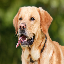

In [77]:
#making prediction for cat
# making prediction for dog....
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
test_image

In [78]:
test_image=image.img_to_array(test_image)
test_image

array([[[ 54.,  58.,   7.],
        [ 58.,  63.,   9.],
        [ 64.,  67.,  10.],
        ...,
        [136., 144.,  71.],
        [140., 150.,  77.],
        [139., 149.,  78.]],

       [[ 48.,  54.,   6.],
        [ 51.,  58.,   7.],
        [ 58.,  63.,   9.],
        ...,
        [129., 137.,  64.],
        [139., 149.,  78.],
        [141., 151.,  80.]],

       [[ 48.,  56.,   7.],
        [ 48.,  56.,   7.],
        [ 54.,  61.,  10.],
        ...,
        [123., 130.,  63.],
        [136., 145.,  80.],
        [140., 149.,  82.]],

       ...,

       [[ 46.,  55.,  12.],
        [ 42.,  50.,   9.],
        [ 38.,  49.,   9.],
        ...,
        [239., 205., 170.],
        [235., 209., 186.],
        [229., 202., 173.]],

       [[ 50.,  57.,  15.],
        [ 42.,  50.,   9.],
        [ 44.,  52.,  11.],
        ...,
        [234., 200., 162.],
        [236., 206., 178.],
        [234., 203., 174.]],

       [[ 53.,  59.,  13.],
        [ 43.,  51.,  10.],
        [ 49.,  

In [79]:
test_image=np.expand_dims(test_image,axis=0)
test_image

array([[[[ 54.,  58.,   7.],
         [ 58.,  63.,   9.],
         [ 64.,  67.,  10.],
         ...,
         [136., 144.,  71.],
         [140., 150.,  77.],
         [139., 149.,  78.]],

        [[ 48.,  54.,   6.],
         [ 51.,  58.,   7.],
         [ 58.,  63.,   9.],
         ...,
         [129., 137.,  64.],
         [139., 149.,  78.],
         [141., 151.,  80.]],

        [[ 48.,  56.,   7.],
         [ 48.,  56.,   7.],
         [ 54.,  61.,  10.],
         ...,
         [123., 130.,  63.],
         [136., 145.,  80.],
         [140., 149.,  82.]],

        ...,

        [[ 46.,  55.,  12.],
         [ 42.,  50.,   9.],
         [ 38.,  49.,   9.],
         ...,
         [239., 205., 170.],
         [235., 209., 186.],
         [229., 202., 173.]],

        [[ 50.,  57.,  15.],
         [ 42.,  50.,   9.],
         [ 44.,  52.,  11.],
         ...,
         [234., 200., 162.],
         [236., 206., 178.],
         [234., 203., 174.]],

        [[ 53.,  59.,  13.],
       

In [80]:
result=classifier.predict(test_image)
result

array([[1.]], dtype=float32)

In [81]:
if result[0][0]==1:
    print('dog')
else:
    print('cat')

dog
